In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r'''C:\Users\solov\DZ37/Position_Salaries.csv''')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
x = data['Level'].to_numpy().reshape(-1, 1)
y = data['Salary']

Text(0, 0.5, 'Salary')

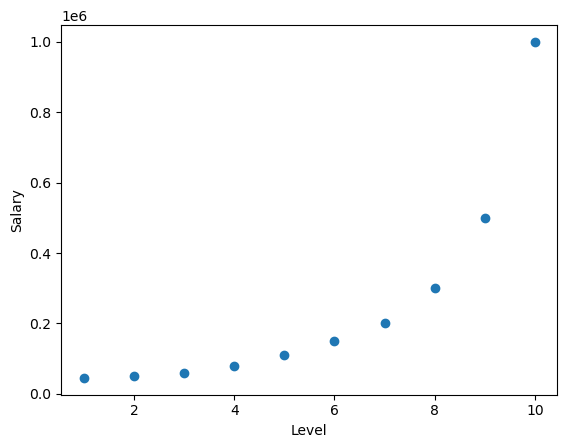

In [6]:
plt.scatter(x, y)
plt.xlabel('Level')
plt.ylabel('Salary')

In [7]:
degrees = range(1, 10)
scores = []
for degree in degrees:
    model = PF(degree)
    x_polynomial = model.fit_transform(x)
    linear_model = LR()
    score = np.mean(cross_val_score(linear_model, x_polynomial, y, cv = 2))
    scores.append(score)

scores

[-421.90987837176175,
 -1674.956170031773,
 -4686.904415608918,
 -20136.07835161801,
 -1362.1456946551066,
 -169.8272143584884,
 -373.29532193457055,
 -11866.633274867285,
 -502281.0372470681]

In [8]:
best_degree = degrees[np.argmax(scores)]
best_degree

6

In [9]:
model = PF(best_degree)

In [10]:
x_polynomial = model.fit_transform(x)

In [11]:
model_linear = LR().fit(x_polynomial, y)

In [12]:
x_pred = np.linspace(0, 10, 50).reshape(-1, 1)

In [13]:
x_pred_polynom = model.transform(x_pred)

In [14]:
y_pred = model_linear.predict(x_pred_polynom)

Text(0.5, 1.0, 'Polynimial Regression')

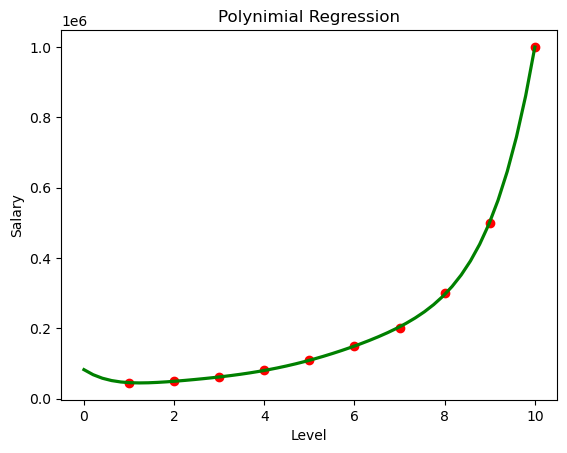

In [15]:
plt.scatter(x, y, color = 'red')
plt.plot(x_pred, y_pred, color = 'green', linewidth = 2.3)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynimial Regression')

In [16]:
score = model_linear.score(x_polynomial, y)
score

0.9999494749253776